<a href="https://colab.research.google.com/github/mgt412/course_notebooks/blob/master/MGT412_Lecture_6_Stochastic_Processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 6: Stochastic Processes in Python. Simulating Stock Price Paths.

## Random numbers

We work with random numbers generated by functions from the `numpy.random` sublibrary.

In [0]:
# Packages we need
import numpy as np
import numpy.random as npr

### Uniform random numbers

Easiest function: `npr.rand(x)` returns an array of size x from the Uniform [0; 1] distribution.

In [3]:
# uniform random numbers on [0,1]
uniforms=npr.rand(10)
uniforms

array([0.15963542, 0.99875228, 0.05593152, 0.56095418, 0.62651736,
       0.93008948, 0.71956965, 0.00994139, 0.32516231, 0.11786653])

You can extend the array to multiple dimensions: `npr.rand(x,y,z,...)`

In [4]:
# matrix of uniform random numbers
uniform_mat=npr.rand(2,2)
uniform_mat

array([[0.35542277, 0.50836569],
       [0.67757183, 0.43520144]])

To get random numbers between two different real numbers, $a$ and $b$, you can transform `npr.rand(x)` as:

> `a+(b-a)*npr.rand(x,y,z,...)`

In [5]:
# transformation from [0,1] to [a,b]
a=2
b=10
uniform_a_b=a+(b-a)*npr.rand(10)
uniform_a_b

array([4.72540101, 8.29965208, 6.69767812, 9.49759827, 8.85809417,
       9.31604961, 4.02465102, 7.40638016, 9.19329791, 8.71483668])

### Other distributions

`npr.randn`: standard normal random numbers.

In [6]:
normals=npr.randn(10) # normal distribution
normals

array([ 0.69107613, -0.1045532 ,  2.063894  ,  0.61740386,  0.30826959,
       -0.674583  ,  1.25776192,  0.63207405,  0.4949463 ,  1.14778899])

`npr.randint(low,high)`: random integers from “low” (inclusive) to “high” (exclusive)

In [8]:
integers=npr.randint(2,6,5) # random integers (min,max,size)
integers

array([4, 3, 5, 5, 5])

`npr.choice(v, size=x, replace=True or False)`: random sample from given vector v, of size x, with or without replacement.

In [7]:
choice=npr.choice(range(0,6), size=10, replace=True) # random sampling
choice

array([4, 1, 2, 5, 2, 3, 2, 5, 3, 5])

### Application 1: Standard normals

Draw from the standard normal distribution eight samples. The first sample has one observation, the second 10 observations, the third $10^2$ observations, the eighth one, $10^7$. Plot the means and standard deviation of each sample against the sample decade (log-10 scale).What do you observe? How do you interpret the observation?

Text(0,0.5,'Sample mean')

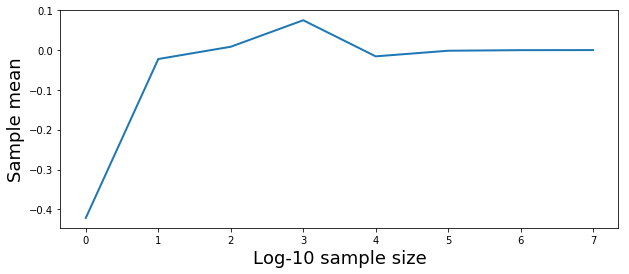

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

exponents=range(0,8) # from 10 to 10 million observations

means=np.zeros(8)
stds=np.zeros(8)

for sample_size in [10**x for x in exponents]:
    random_sample=npr.randn(sample_size)
    means[int(np.log10(sample_size))]=random_sample.mean()
    stds[int(np.log10(sample_size))]=random_sample.std()

plt.figure(figsize=(10,4))    
plt.plot(means,lw=2)
plt.xlabel("Log-10 sample size",fontsize=18)
plt.ylabel("Sample mean",fontsize=18)

### Application 2: Sampling from a population

There are nine students in a class. One of them is 23, two are 24,three are 25, one is 26, and two are 27. Draw a 10,000-large sample from their age distribution. Plot a histogram of the empirical frequencies. What do you expect the height of the third column tobe relative to the fifth?

Text(0,0.5,'Frequency')

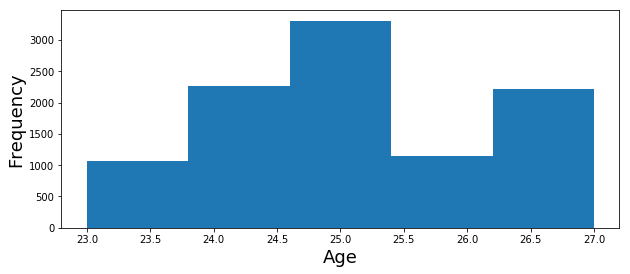

In [13]:
ages=[23,24,24,25,25,25,26,27,27]
age_sample=npr.choice(ages, 10000)
plt.figure(figsize=(10,4)) 
plt.hist(age_sample, bins=5)
plt.xlabel("Age", fontsize=18)
plt.ylabel("Frequency", fontsize=18)

### Application 1.3: How to draw from arbitrary distributions?

We define an arbitrary cumulative distribution function:
$$ F\left(x\right)=\frac{1}{1+\exp\left(-x\right)} $$

We quickly see that $1 > F (x) > 0$, also $F$ is non-decreasing. Also, $$\lim_{x\rightarrow -\infty} F(x)=0$$ and $$\lim_{x\rightarrow \infty} F(x)=1.$$ 

Therefore, F satisfies all properties of a CDF. We want to draw a 10,000-large sample from this distribution.

First, we note that the CDF returns always a number between zero and one:
$$ F\left(x\right)=\frac{1}{1+\exp\left(-x\right)} = \mathbb{P}\left(X<x\right) = y $$

Moreover, the output of the CDF function is uniformly distributed:
\begin{equation*}
\mathbb{P}\left(Y\leq y\right)=\mathbb{P}\left(F\left(X\right)<y\right)=\mathbb{P}\left(X<F^{-1}\left(y\right)\right)=F\left(F^{-1}\left(y\right)\right)=y
\end{equation*}

The algorithm becomes simple:
1. Draw a 10,000 sample from the uniform distribution (y values)
2. Compute x values as $F^{-1}\left(y\right)$:
	\begin{equation}
	x=-\log\left(\frac{1}{y}-1\right)
	\end{equation}
  


Thanks to vectorization, the solution is literally two short lines of code:

In [0]:
y=npr.rand(10000) # simulate uniforms (i.e., quantiles)
x=-np.log(1.0/y-1) # invert the c.d.f. and evaluate over quantiles

## Simulation

### Black-Scholes stock prices

Let the stock price $S_t$ follow a geometric brownian motion with drift $r$ and volatility $\sigma$, i.e.,

\begin{equation}
dS_t=r \times dt+ \sigma \times dz_t
\end{equation}

The stock price at time $T$, $S_T$, is:

\begin{equation}
S_T=S_0\exp\left(\left(r-\frac{1}{2}\sigma^2\right)T+\sigma\sqrt{T} z\right),
\end{equation}

where $z$ is a standard normal variable.

Let us simulate 100,000 possible stock prices in two-years time. The current stock price is 100. The risk-free rate is 5% per annum, and the annualised volatility is 25%. 

1. Plot a histogram of the simulated stock prices. What distribution do they resemble?
2. What is the mean and variance of the simulated stock prices?
3. What happens with the mean and variance if we look at a three-years window?

Text(0.5,0,'Stock price')

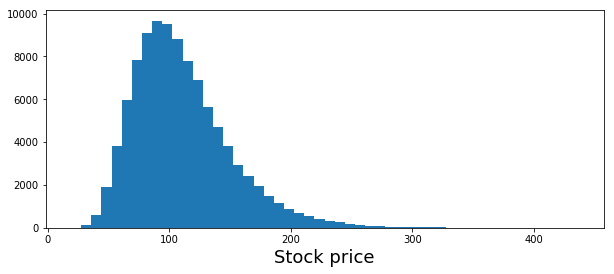

In [15]:
S0=100
r=0.05
sigma=0.25
T=2
I=10**5
ST1=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*npr.randn(I))

plt.figure(figsize=(10,4))
plt.hist(ST1, bins=50)
plt.xlabel("Stock price", fontsize=18)

In [16]:
mprice=ST1.mean()
sprice=ST1.std()
(mprice,sprice)

(110.5810084542392, 40.41624755966976)

## Stochastic processes

### Black-Scholes stock prices paths

Consider the following dynamic for the stock price:

\begin{equation}
dS_t=r S_t\times dt+ \sigma S_t \times dZ_t
\end{equation}

In discrete time, from $t-\Delta t$ to $t$, we have (almost) the exact same expression as before:

\begin{equation}
S_t=S_{t-\Delta t}\exp\left(\left(r-\frac{1}{2}\sigma^2\right)\Delta t+\sigma\sqrt{\Delta t} z\right),
\end{equation}

Now though, we want a full **path** of stock prices, not just the end values.


Let us simulate 100,000 possible stock paths in two-years time, using 25 steps per year. The current stock price is 100. The risk-free rate is 5% per annum, and the annualised volatility is 25%. 

1. Plot the first and the last path of the stock price.
2. How would the path look if the risk-free rate is 2%? or the volatility 50%?

Text(0,0.5,'Price')

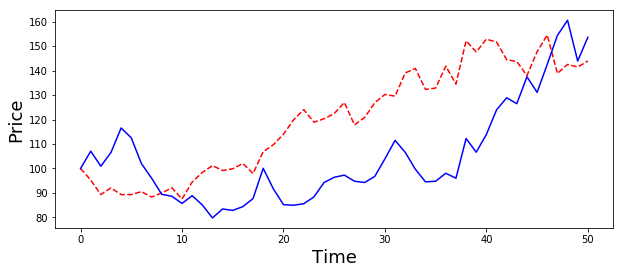

In [19]:
I=10**5
M=50
dt=np.float(T)/M
S=np.zeros((M+1,I))
S[0]=S0
for t in range(1,M+1):
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*npr.randn(I))

plt.figure(figsize=(10,4))
plt.plot(S[:,0],ls='--', c='r')
plt.plot(S[:,I-1],c='b')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Price", fontsize=18)


### Cox-Ingersoll-Ross model

Consider the following mean-reverting dynamic for the interest rate $x_t$:

$$ dx_t=\kappa\left(\theta-x_t\right) \times dt+ \sigma \sqrt{x_t} \times dZ_t$$

The parameters: $\kappa$ is the speed of mean-reversion, $\theta$ is the long-run mean, $\sigma$ is the volatility parameter.


1. The discrete solution to the stochastic differential equation is a little bit more involved. 
2. One nice property of this model is that the value of $x$ always remains positive (e.g., the case of interest rates).
3. In the discrete time version, this may not hold always -- so we need to adjust!

**Discretization**

Let $s=t-\Delta t$ and $x^+=\max\left(x,0\right)$. 

\begin{align*}
\tilde{x}_t&=\tilde{x}_{t-\Delta}+\kappa\left(\theta-\tilde{x}^+_{t-\Delta}\right)\Delta t+\sigma \sqrt{\tilde{x}^+_{t-\Delta}} \sqrt{\Delta t} z_t \\
x_t&=\tilde{x}^+_{t}
\end{align*}

**Application**
Let us simulate 100,000 possible interest paths in two-years time, using 25 steps per year. The current interest rate is 5%.

The other parameters are: $\kappa=3$, $\theta=0.02$, $\sigma=0.1$.

Text(0,0.5,'Interest rate')

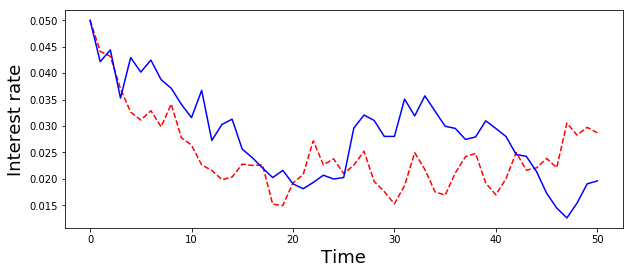

In [20]:
x0=0.05
kappa=3.0
theta=0.02
sigma=0.1

xh=np.zeros((M+1,I))
x1=np.zeros_like(xh)

xh[0]=x0
x1[0]=x0

for t in range(1,M+1):
    xh[t]=xh[t-1]+kappa*(theta-np.maximum(xh[t-1],0))*dt+sigma*np.sqrt(np.maximum(xh[t-1],0))*np.sqrt(dt)*npr.randn(I)
    x1=np.maximum(xh,0)

plt.figure(figsize=(10,4))
plt.plot(x1[:,0],ls='--', c='r')
plt.plot(x1[:,I-1],c='b')
plt.xlabel("Time", fontsize=18)
plt.ylabel("Interest rate", fontsize=18)

### Heston stochastic volatility model

Consider the following dynamic of the stock price:

\begin{equation}
dS_t=r S_t\times dt+ \sqrt{v_t} S_t \times dZ^1_t,
\end{equation}

and the following mean-reverting process for the volatility:

\begin{equation}
dv_t=\kappa\left(\theta-v_t\right) \times dt+ \sigma \sqrt{v_t} \times dZ^2_t,
\end{equation}
 
where the two Brownian motions are correlated, $dZ^1_t dZ^2_t=\rho dt$.

**Correlated normals.**
To generate two normal variables, $z_1$ and $z_2$, with correlation $\rho$:

1. Draw $x_1$ and $x_2$ independent normal variables.
2. Compute:
\begin{equation}
z_2=\rho x_1+\sqrt{1-\rho^2} x_2
\end{equation}
3. Let $z_1=x_1$. Done!

**Application.** Let us simulate 100,000 possible volatility and stock price paths in two-years time, using 25 steps per year. Parameters: M=50, I=100000, S0=100, r=0.05, v0=0.1, $\kappa$=3.0, $\theta$=0.25, $\sigma$=0.1, $\rho$=0.6, T=2.

In [0]:
params=(50,10**5,100,0.05,0.1, 3.0,0.25,0.1,0.6,2.0)
(M,I,S0,r,v0,kappa,theta,sigma,rho,T)=params

dt=T/M

vh=np.zeros((M+1,I))
v1=np.zeros_like(vh)

vh[0]=v0
v1[0]=v0


z1=npr.randn(M+1,I)

for t in range(1,M+1):
    vh[t]=vh[t-1]+kappa*(theta-np.maximum(vh[t-1],0))*dt+sigma*np.sqrt(np.maximum(vh[t-1],0))*np.sqrt(dt)*z1[t]
    v1=np.maximum(vh,0)

z2=rho*z1+np.sqrt(1-rho**2)*npr.randn(M+1,I)

S=np.zeros((M+1,I))
S[0]=S0
for t in range(1,M+1):
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+np.sqrt(v1[t])*np.sqrt(dt)*z2[t])

## Value-at-Risk (VaR)

The maximum possible loss (negative return) on a portfolio, after we exclude all worse outcomes whose combined probability is at most $p$. 

Formally,

$$ \mathbb{P} \left(R\leq \text{VaR}_p \right) =p. $$ 

We first compute (total) returns for each stock price path:
1. `S[-1]` is the row of final prices for the 100,000 simulations.
2. `S[0]` is the row of initial prices.

In [23]:
S[0], S[-1] # initial and final prices of the stock (GBM)

(array([100., 100., 100., ..., 100., 100., 100.]),
 array([129.73410109, 121.67296108,  39.225152  , ..., 115.8309866 ,
        115.86647689, 334.63226824]))

In [24]:
# Value at risk
var=0.99 # level of value at risk
R_GM=(S[-1]/S[0]-1)*100 # returns for each stock path
var_value=np.percentile(R_GM, 100*(1-var))
var_value

-74.75684434548022

**Interpretation for VaR:** with probability 99% the loss will not exceed -75% of the initial stock price.

The *expected shortfall* is the expected loss conditional that we are in the “tail case,” i.e., the loss exceeds the Value-at-Risk.

$$\text{Expected Shortfall} = \mathbb{E} \left[ R \mid R\leq \text{VaR} \right]$$


In Python, it is extremely easy to compute, even without computing the VaR directly!

In [26]:
# Expected shortfall
ES=R_GM[R_GM<np.percentile(R_GM, 100*(1-var))].mean()
ES

-79.26065027166372